In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [29]:
dataset_dir = r"C:\Users\aashutosh kumar\Videos\Audio"
file_paths = []
labels_list = []

for labels in (os.listdir(dataset_dir)[:7]):
    l = labels.split("_")[1]
    path = os.path.join(dataset_dir, labels)
    for i in os.listdir(path):
        labels_list.append(l)
        final_path = os.path.join(path, i)
        file_paths.append(final_path)
        


In [32]:
dataset = pd.DataFrame()
dataset["paths"] = file_paths
dataset["emotion"] = labels_list
dataset.head(5)

,paths,emotion
0,C:\Users\aashutosh kumar\Videos\Audio\OAF_angr...,angry
1,C:\Users\aashutosh kumar\Videos\Audio\OAF_angr...,angry
2,C:\Users\aashutosh kumar\Videos\Audio\OAF_angr...,angry
3,C:\Users\aashutosh kumar\Videos\Audio\OAF_angr...,angry
4,C:\Users\aashutosh kumar\Videos\Audio\OAF_angr...,angry


In [33]:
dataset.isnull().sum()

paths      0
emotion    0
dtype: int64

<Axes: xlabel='emotion', ylabel='count'>

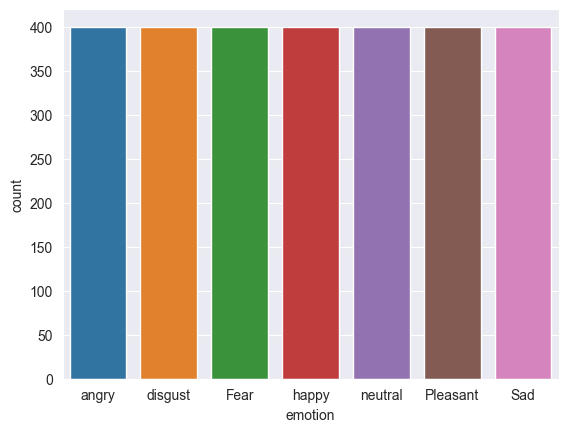

In [36]:
sns.set_style("darkgrid")
sns.countplot(data = dataset, x = "emotion", hue = "emotion")